# Definition of Linear Regression:

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a straight line to the observed data points. It assumes that this relationship is approximately linear, meaning that changes in the independent variables are associated with a constant change in the dependent variable. Linear regression aims to find the best-fitting line that minimizes the differences between the observed and predicted values of the dependent variable. Here is what a linear regression line would look like




<img src="Linear.png" width="400" height="300"/>

# Loading Necessary Packages

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [65]:
#import and load data from csv file 
data  = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [66]:
data.shape

(1338, 7)

In [67]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [68]:
# Checking for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

After inspecting the data, we can see that this data is very clean and is ready for processing 

# Data Analysis

In [69]:
# Statistical data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

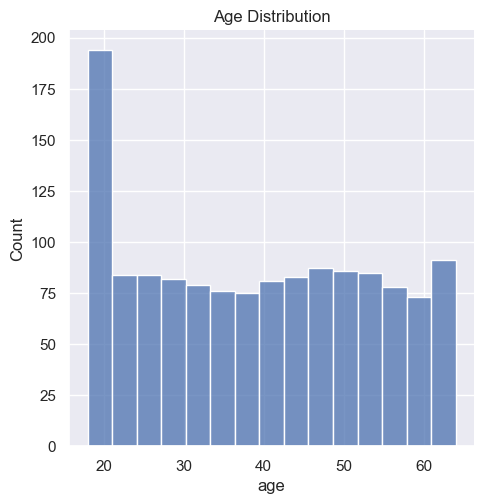

In [70]:
# Distribution of Age column
sns.set()
plt.figure(figsize = (6,6))
sns.displot(data['age'], bins = 15)
plt.title('Age Distribution')
plt.show();

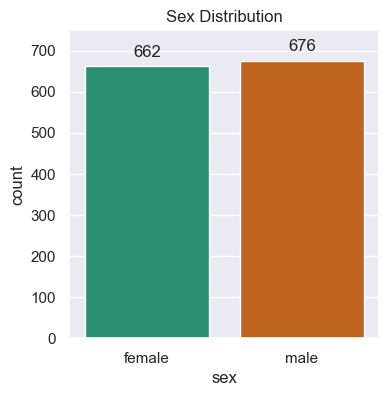

In [71]:
# Gender column
plt.figure(figsize=(4, 4))
ax = sns.countplot(x=data['sex'], hue=data['sex'],palette='Dark2')

# Adding count values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.ylim(0, 750)
plt.title('Sex Distribution')
plt.show()

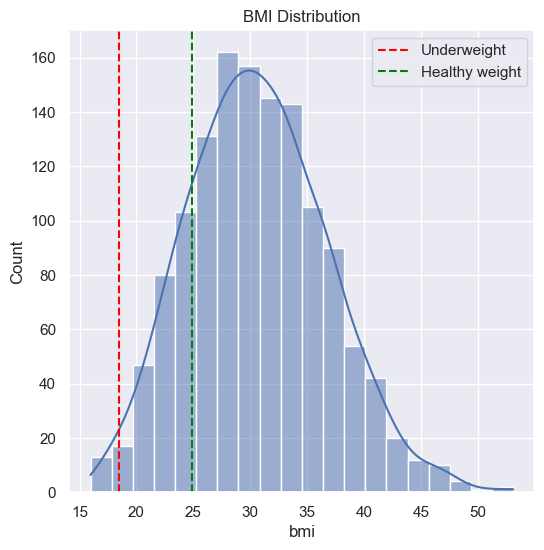

In [72]:

sns.set()
plt.figure(figsize=(6, 6))
sns.histplot(data['bmi'], bins=20, kde=True)  # Set kde=True to add the curve line

# Add vertical lines for normal BMI range
plt.axvline(x=18.5, color='red', linestyle='--', label='Underweight')
plt.axvline(x=24.9, color='green', linestyle='--', label='Healthy weight')

plt.title('BMI Distribution')
plt.legend()
plt.show()

According to the CDC, the normal or healthy BMI ranges between 18.5 and 24.9. Here we can see that the center of the distribution is closer to 30, which suggests that the majority of entries in this data set categorized as overweight or obsesity

Text(0.5, 1.0, 'Children')

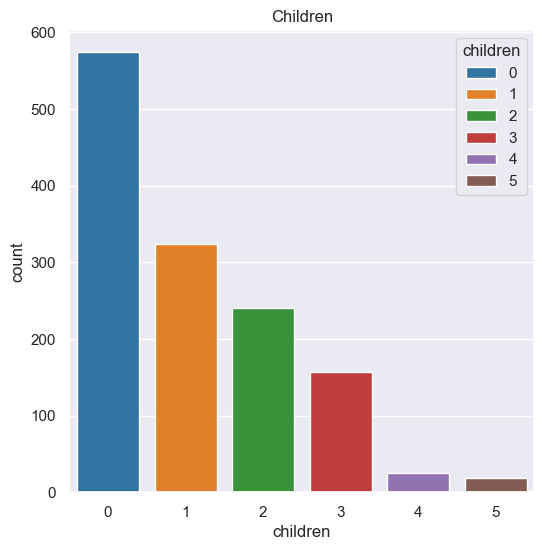

In [73]:
# Childen column
plt.figure(figsize = (6,6))
sns.countplot(x = data['children'], hue = data['children'], palette = "tab10")
plt.title("Children")

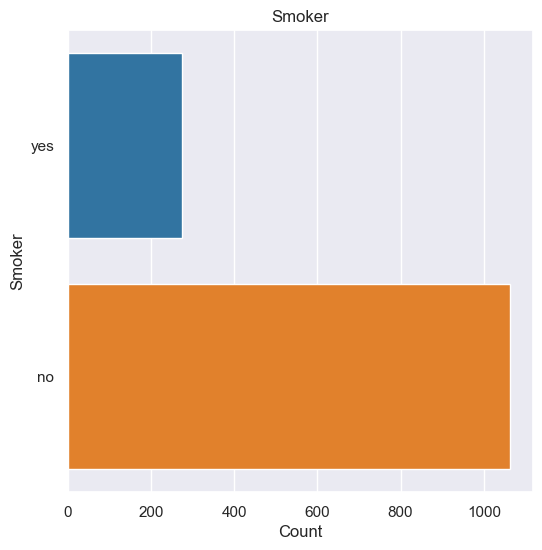

In [74]:
plt.figure(figsize=(6, 6))
sns.countplot(y=data['smoker'], hue=data['smoker'], palette="tab10")
plt.title("Smoker")
plt.xlabel("Count")
plt.ylabel("Smoker")
plt.show()


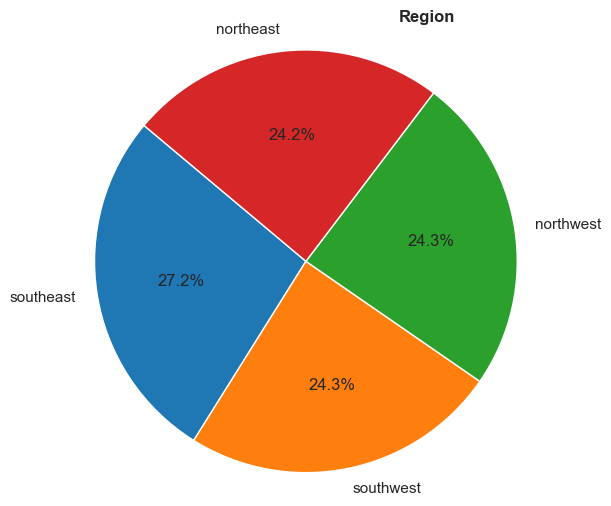

In [75]:
plt.figure(figsize=(6, 6))
data['region'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('tab10'), startangle=140)
plt.title('Region', loc='left')
plt.ylabel(None)  # Remove the default ylabel
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Get the title object and adjust its position
title = plt.title('Region', loc='left', fontweight = 'bold')
title.set_position([0.7, 0.5])

plt.show()


Text(0.5, 1.0, 'Charges')

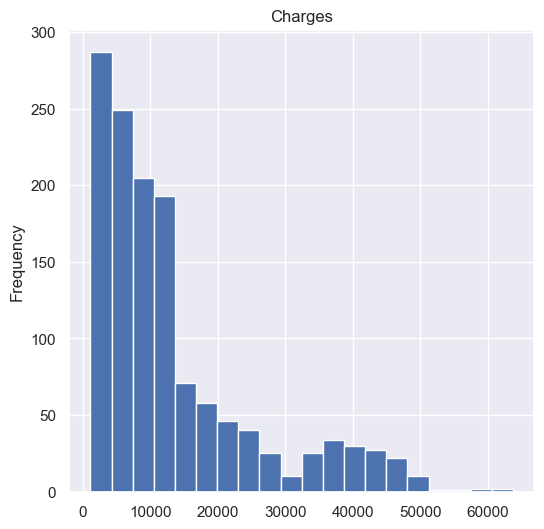

In [76]:
plt.figure(figsize = (6,6))
data['charges'].plot(kind = 'hist', bins  = 20)
plt.title('Charges')

# Converting categorical data to numerical (encoding)


In [77]:
# encoding sex column
data.replace({'sex': {'male': 0, 'female': 1}}, inplace=True) #replacing male: 1, female: 1
# Encoding smaker column
data.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
#encoding Region column
data.replace({'region': {'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3}}, inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


# Loading and training the Linear Regression model

In [78]:
X = data.drop(columns=['charges'])
y = data['charges']

In [79]:
model = LinearRegression()

In [80]:
# spliting the data into Training and Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [81]:
# Testing the model
y_preds = model.predict(X_test)
y_preds[:20]  # getting the first 20 items from the prediction

array([8.83852829e+03, 1.58440646e+04, 1.37064031e+04, 2.64744452e+03,
       8.32755040e+03, 2.78974840e+04, 6.69827407e+03, 9.69046461e+03,
       4.39239369e+00, 1.27701921e+04, 3.83973964e+01, 3.29070154e+04,
       8.22042681e+03, 2.91867949e+04, 3.82440596e+03, 6.49800616e+03,
       9.73037668e+02, 1.56200731e+04, 5.27208054e+03, 3.61607516e+03])

In [82]:
np.array(y_test)[:20]  # the actual values of the target

array([12032.326  , 12979.358  , 11488.31695, 16586.49771, 10107.2206 ,
       33900.653  ,  6710.1919 ,  8823.279  ,  2117.33885,  5757.41345,
        1964.78   , 22412.6485 , 24603.04837, 19719.6947 ,  3736.4647 ,
        4504.6624 ,  2150.469  , 14590.63205,  3227.1211 ,  1909.52745])

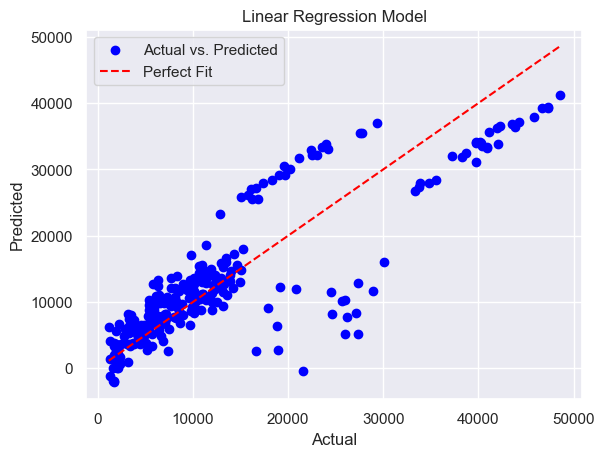

In [83]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.scatter(y_test, y_preds, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Model')
plt.legend()
plt.show()


# Evaluate the model

In [84]:
score = model.score(X_test, y_test) #accurary of the model
print(f"The accuracy of the model is {score}")

The accuracy of the model is 0.7346807506167863


In [85]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(" The RMSE of the model is:", rmse)

 The RMSE of the model is: 15805.38832341926


# Save the Model

In [128]:
import pickle
pickle.dump(model,open('Linear Regression Model.pk1', 'wb'))

In [131]:
#load the model
loaded_model  = pickle.load(open('Linear Regression Model.pk1', 'rb'))

# Create some random data and test

In [132]:
# Set random seed for reproducibility
np.random.seed(0)

# Define the number of rows for the DataFrame
num_rows = 1000

# Generate random data for each column
age = np.random.randint(18, 65, size=num_rows)
sex = np.random.choice(['male', 'female'], size=num_rows)
bmi = np.random.uniform(18.5, 40, size=num_rows)
children = np.random.randint(0, 5, size=num_rows)
smoker = np.random.choice(['yes', 'no'], size=num_rows)
region = np.random.choice(['northeast', 'northwest', 'southeast', 'southwest'], size=num_rows)

# Create a DataFrame
dummy_data = pd.DataFrame({
    'age': age,
    'sex': sex,
    'bmi': bmi,
    'children': children,
    'smoker': smoker,
    'region': region
})

# Display the DataFrame
print(dummy_data.head())


   age     sex        bmi  children smoker     region
0   62  female  36.611639         3     no  southeast
1   18    male  26.309315         2     no  southwest
2   21  female  23.805607         3    yes  southwest
3   21  female  29.112198         0    yes  northwest
4   57    male  21.774087         1    yes  southwest


In [133]:
#encoding the data
dummy_data.replace({'sex': {'male': 0, 'female': 1}}, inplace=True) #replacing male: 1, female: 1
# Encoding smaker column
dummy_data.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
#encoding Region column
dummy_data.replace({'region': {'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3}}, inplace=True)
dummy_data.head()

,age,sex,bmi,children,smoker,region
0,62,1,36.611639,3,1,0
1,18,0,26.309315,2,1,1
2,21,1,23.805607,3,0,1
3,21,1,29.112198,0,0,2
4,57,0,21.774087,1,0,1


In [134]:
X_test1= dummy_data
pred1 = loaded_model.predict(X_test1) 
pred1[:20]

array([16585.34982324,  1557.7068059 , 25970.70217996, 26926.44197179,
       33407.4624394 , 28469.91655306, 33881.68113051, 32673.35593087,
       40180.37131946, 34181.43002503,  5422.13880686, 11491.65272588,
       35463.30258985, 29337.78476718,  4341.09135835, 38626.10620158,
       39729.32220716, 35259.69594491, 42052.11450897,  7744.67691006])

In [135]:
# Append the charges column to the dummy_data dataframe
dummy_data['charges'] = pred1
dummy_data

,age,sex,bmi,children,smoker,region,charges
0,62,1,36.611639,3,1,0,16585.349823
1,18,0,26.309315,2,1,1,1557.706806
2,21,1,23.805607,3,0,1,25970.702180
3,21,1,29.112198,0,0,2,26926.441972
4,57,0,21.774087,1,0,1,33407.462439
...,...,...,...,...,...,...,...
995,39,1,22.361152,2,0,0,29122.886448
996,38,1,30.264458,0,1,2,7650.080380
997,60,0,34.384873,0,1,0,13801.341957
998,35,1,32.849482,3,0,2,33252.890327
